In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation

### 2D Temperature Heat Map

In [2]:
# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
X.shape
Y.shape

(100, 100)

(100, 100)

In [3]:
# Define temperature function
# Formula: Z = 10 - (X^2 + Y^2)
Z = 10 - (X**2 + Y**2)
Z.shape

(100, 100)

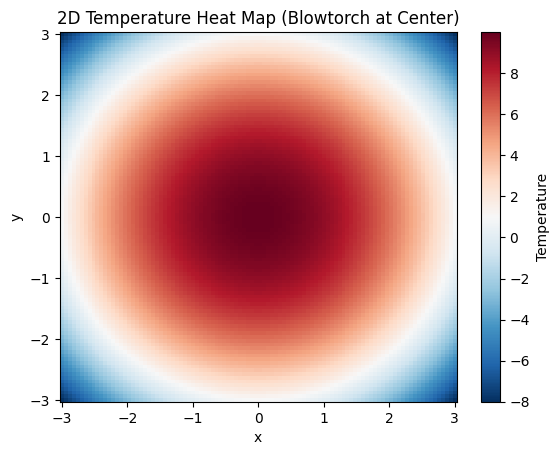

In [4]:
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='Auto')
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.title('2D Temperature Heat Map (Blowtorch at Center)')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

### 2D Temperature Heat Map With Gradient Arrows

In [5]:
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)

Z = 10 - (X**2 + Y**2)
Z.shape

(20, 20)

In [6]:
dy, dx = np.gradient(Z)
dy.shape
dx.shape

(20, 20)

(20, 20)

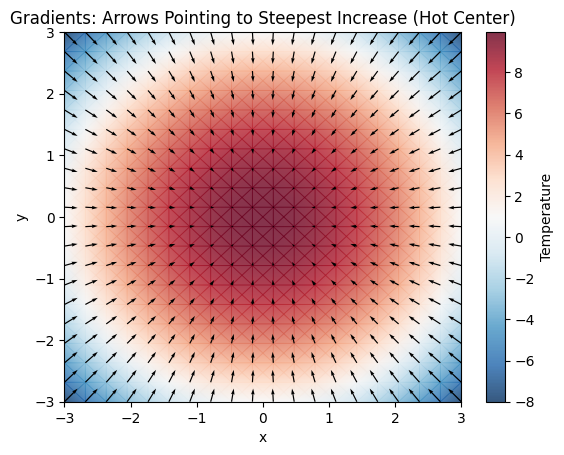

In [7]:
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='gouraud', alpha=0.8)
_ = plt.quiver(X, Y, dx, dy)
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.title('Gradients: Arrows Pointing to Steepest Increase (Hot Center)')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

### 3D "Temperature Hill"

In [8]:
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(x, y)
zz = 10 - (xx**2 + yy**2)

In [9]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz, colorscale='RdBu_r'
)])

fig.update_layout(
    title='3D Temperature Hill',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
    ),
    width=800, height=600
)

### 3D Gaussian Temperature Hill

In [10]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

Gaussian Formula: z = A * exp(-(x^2 + y^2) / (2 * sigma^2))

This creates a "bump" that flattens out at the edges

In [11]:
A = 10        # Peak height
sigma = 2.5   # Width of the hill
zz = A * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

In [12]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='RdBu_r',
    showscale=False
)])

fig.update_layout(
    title='Gaussian Temperature Hill (Flattens at Edges)',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='Temperature (Z)',
        zaxis=dict(range=[0, 10]),  # Keep height consistent
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    ),
    width=800, height=600
)

### Visualizing gradient descent (For model with 1 parameter)

In [13]:
x = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 0.9])
y = np.array([0.1, 0.15, 0.4, 0.55, 0.8, 1.2, 1.5, 1.7])
n = len(x)

**The Model parameter 'm' decides the cost of the model**

In [14]:
search_space = np.arange(0, 2.1, 0.2)
search_space

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

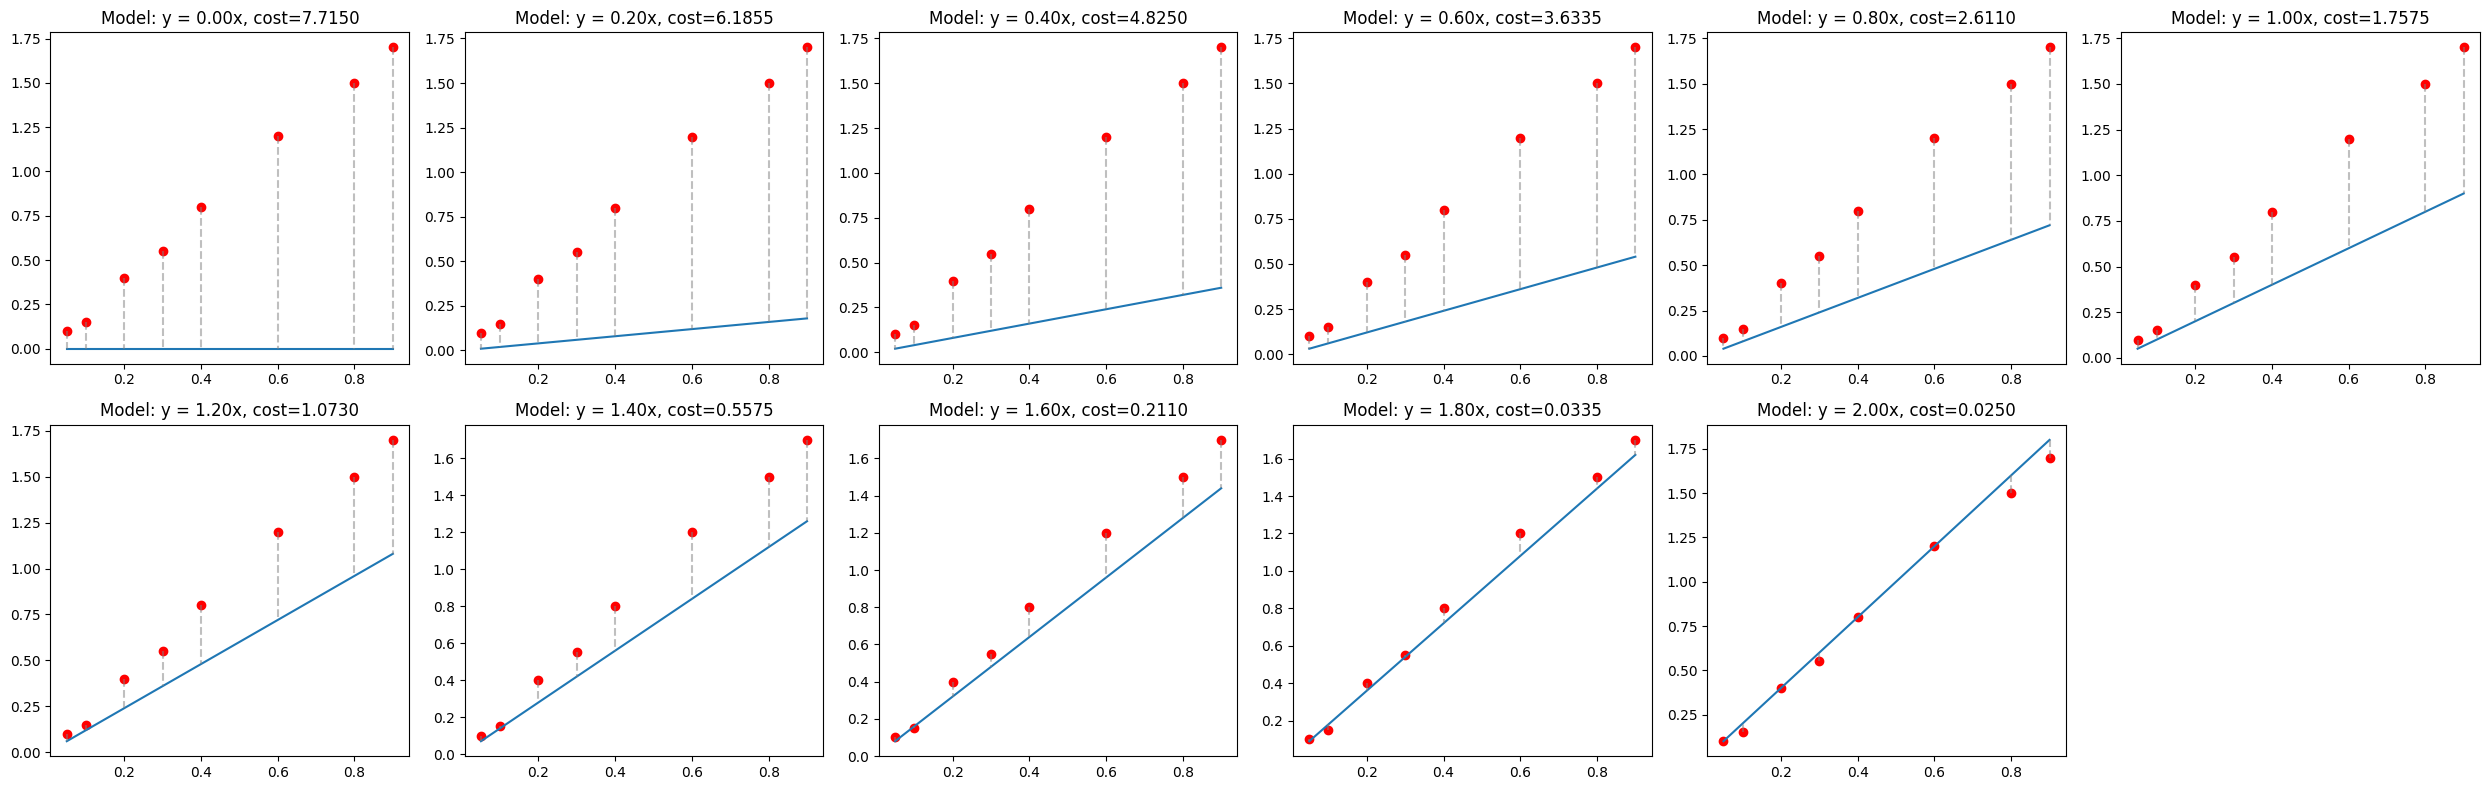

In [15]:
n_plots = len(search_space)
n_cols = 6
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4*n_rows))
axes = axes.flatten()

for idx, m in enumerate(search_space):
  y_pred = m * x
  cost = np.sum((y - y_pred)**2)

  _ = axes[idx].scatter(x, y, color='red', label='Data')
  _ = axes[idx].plot(x, y_pred, label='Model (Regression Line)')
  _ = axes[idx].vlines(x, y, y_pred, linestyle='--',
                       color='gray', alpha=0.5, label='Residuals')
  _ = axes[idx].set_title(f'Model: y = {m:.2f}x, cost={cost:.4f}')

for j in range(idx+1, len(axes)):
  plt.delaxes(axes[j])

plt.tight_layout()

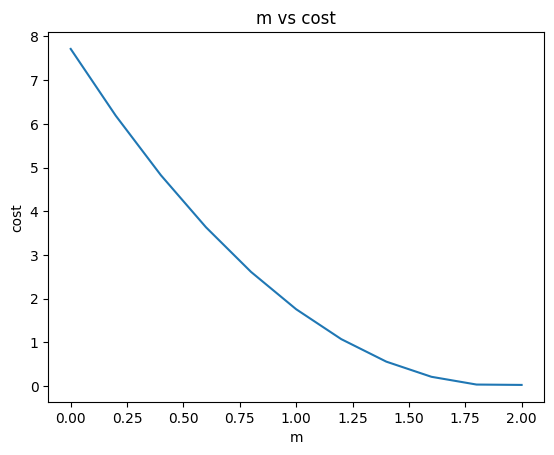

In [16]:
cost_values = [np.sum((y - m*x)**2) for m in search_space]
_ = plt.plot(search_space, cost_values)
_ = plt.title('m vs cost')
_ = plt.xlabel('m')
_ = plt.ylabel('cost')

Let's implement gradient descent

In [17]:
# J(β)
# For simplicity J(β = m) (Just 1 param)
# Model: y = mx
def cost(m):
  y_pred = m * x
  ssr = np.sum((y - y_pred) ** 2)
  return ssr

In [18]:
def grad(m):
  return 2 * np.sum(x * (m*x - y))

In [19]:
# GD Update Rule: beta_new = beta_old - alpha * grad
# In this case: m_new = m_old - alpha * grad
m = 0
alpha = 0.5
epoch = 10
history = [(m, cost(m))]

for _ in range(epoch):
  m -= alpha * grad(m)
  history.append((m, cost(m)))

history = np.array(history)
history[-1]

array([-3.63679844, 65.00452837])

In [20]:
m_values = np.linspace(min(history[:, 0]) - 0.5, max(history[:, 0]) + 0.5, 100)
cost_values = [np.sum((y - m*x)**2) for m in m_values]

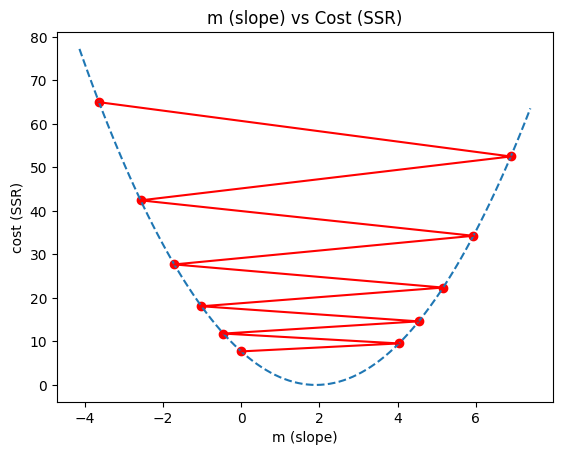

In [21]:
_ = plt.plot(m_values, cost_values, linestyle='--')
_ = plt.scatter(history[:, 0], history[:, 1], color='red')
_ = plt.plot(history[:, 0], history[:, 1], color='red')
_ = plt.title('m (slope) vs Cost (SSR)')
_ = plt.xlabel('m (slope)')
_ = plt.ylabel('cost (SSR)')

**Create Plotly Animation**

In [22]:
fig = go.Figure()

_ = fig.add_trace(go.Scatter(
    x=m_values, y=cost_values, mode='lines',
    line=dict(color='blue', dash='dash'), name='Cost Curve'
))

_ = fig.add_trace(go.Scatter(
    x=[], y=[], mode='lines',
    line=dict(color='rgba(255, 0, 0, 0.5)', width=2), name='Path'
))

_ = fig.add_trace(go.Scatter(
    x=[history[0, 0]], y=[history[0, 1]], mode='markers',
    marker=dict(size=12, color='red'), name='Current Step'
))

fig.frames = [go.Frame(
    data=[
        go.Scatter(x=history[:idx+1, 0], y=history[:idx+1, 1]),
        go.Scatter(x=[row[0]], y=[row[1]]),
    ],
    traces=[1, 2],
    name=str(idx)
)for idx, row in enumerate(history)]

fig.update_layout(
    title='Gradient Descent Visualization',
    xaxis_title='m (slope)',
    yaxis_title='Cost (SSR)',

    width=900, height=600,
    yaxis=dict(range=[history[:, 1].min() - 1, history[:, 1].max() + 1]),
    xaxis=dict(range=[history[:, 0].min() - 0.5, history[:, 0].max() + 0.5]),

    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[
          dict(label='Play',
               method='animate',
               args=[None, dict(frame=dict(duration=500, redraw=False), fromcurrent=True)]
               ),
            dict(label='Reset',
                 method='animate',
                 args=[[str(0)], dict(frame=dict(duration=0, redraw=False), mode='immediate')]
                 )
        ]
    )]
)

3D data

In [23]:
data = np.array([
    [5,  20, 100],  # age(x1), weight(x2), height(y)
    [6,  30, 110],
    [8,  25, 115],
    [7,  40, 120],
    [4,  50, 105],
    [5,  70, 140],
])

df = pd.DataFrame(data, columns=['Age', 'Weight', 'Height'])
df

,Age,Weight,Height
0,5,20,100
1,6,30,110
2,8,25,115
3,7,40,120
4,4,50,105
5,5,70,140


In [24]:
fig = px.scatter_3d(df, x='Age', y='Weight', z='Height')

fig.update_layout(
    width=800,
    height=800
)

### Visualizing Gradient Descent (For a model with 2 parameters)

**Generate Data**

SSR: 27.4449


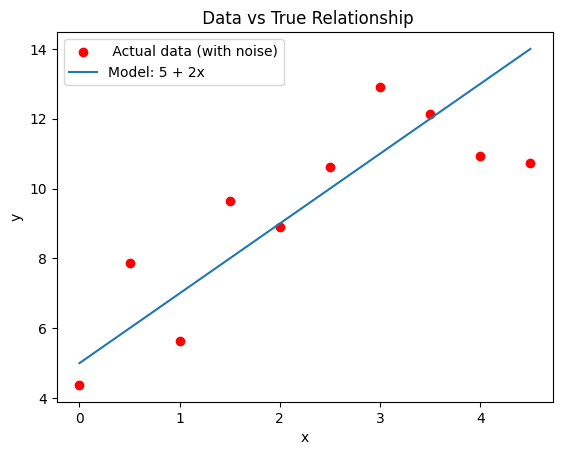

In [25]:
np.random.seed(5)
x = np.arange(0, 5, 0.5)

true_beta0 = 5
true_beta1 = 2

y_base = true_beta0 + true_beta1 * x
noise = np.random.uniform(-1, 1, size=x.shape) * np.random.uniform(0.2, 0.5, size=x.shape) * y_base
y = y_base + noise

y_pred = true_beta0 + true_beta1 * x
ssr = np.sum((y-y_pred)**2)
print(f'SSR: {ssr:.4f}')

_ = plt.scatter(x, y, color='red', label=' Actual data (with noise)')
_ = plt.plot(x, y_pred, label=f'Model: {true_beta0} + {true_beta1}x')
_ = plt.title(' Data vs True Relationship')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.legend()

**Plot of "cost surface" for two parameters (β0 and β1)**

We need to create a grid of all possible combinations, calculate the SSR for each, and then render it using a 3D surface plot.

In [26]:
b0_vals = np.linspace(0, 7, 50)
b1_vals = np.linspace(0, 4, 50)
B0, B1 = np.meshgrid(b0_vals, b1_vals)
Z = sum(((B0 + B1 * xi) - yi)**2 for xi, yi in zip(x, y))
fig = go.Figure(data=[go.Surface(x=b0_vals, y=b1_vals, z=Z, colorscale='Viridis')])

fig.update_layout(
    title='Cost Surface (SSR)',
    width=800, height=600,
    scene=dict(
        xaxis_title='Beta0 (Intercept)',
        yaxis_title='Beta1 (Slope)',
        zaxis_title='SSR (Cost)'
    )
)

**Design Matrix X**

Adding the column of 1s for beta0, but why?

- Vectorized prediction as $X\beta$
- Let's look at what's happening under the hood for a single row:

$$\begin{bmatrix} 1 & x \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} = (1 \cdot \beta_0) + (x \cdot \beta_1)$$

In [27]:
X = np.c_[np.ones(len(x)), x]
X[:5]
X.shape

array([[1. , 0. ],
       [1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ]])

(10, 2)

In [28]:
beta = np.zeros(X.shape[1])  # [ß0, ß1]
beta
beta.shape

array([0., 0.])

(2,)

In [29]:
def cost(beta):
  return np.sum((X @ beta - y)**2)


print(f'Initial Cost: {cost(beta):.4f}')

Initial Cost: 946.8633


In [30]:
def grad(beta):
  residuals = (X @ beta) - y
  return 2 * (X.T @ residuals)

Gradient Function $\nabla J(\beta) = 2 X^T (X\beta - y)$

It returns a vector [dJ/dß0, dJ/dß1], which is exactly what you need to update ß.

In [73]:
beta = np.zeros(X.shape[1])
epochs = 100
alpha = 0.01
history = [(beta.copy(), cost(beta))]

for _ in range(epochs):
  beta -= alpha * grad(beta)
  history.append((beta.copy(), cost(beta)))

history_params = np.array([h[0] for h in history])
history_costs = np.array([h[1] for h in history])

print(f' Final Parameters (ß0, ß1): {history_params[-1]}')
print(f' Final Cost: {history_costs[-1]:.4f}')

 Final Parameters (ß0, ß1): [6.01179517 1.49344294]
 Final Cost: 21.8474


In [74]:
hist_b0 = history_params[:, 0]
hist_b1 = history_params[:, 1]
hist_z = history_costs

In [75]:
b0_vals = np.linspace(history_params[:, 0].min() - 1, history_params[:, 0].max() + 1, 50)
b1_vals = np.linspace(history_params[:, 1].min() - 1, history_params[:, 1].max() + 1, 50)
B0, B1 = np.meshgrid(b0_vals, b1_vals)
Z = sum(((B0 + B1 * xi) - yi) ** 2 for xi, yi in zip(x, y))

In [76]:
fig = go.Figure()

_ = fig.add_trace(go.Surface(x=b0_vals, y=b1_vals, z=Z,
                             colorscale='Viridis', opacity=0.7, name='Cost Surface'))

_ = fig.add_trace(go.Scatter3d(x=[], y=[], z=[],
                               mode='lines', line=dict(color='red', width=4), name='Path'))

_ = fig.add_trace(go.Scatter3d(x=[hist_b0[0]], y=[hist_b1[0]], z=[hist_z[0]],
                               mode='markers', marker=dict(color='red', size=6), name='Current Step'))

fig.frames = [go.Frame(
    data=[
        go.Scatter3d(x=hist_b0[:idx+1], y=hist_b1[:idx+1], z=hist_z[:idx+1]),
        go.Scatter3d(x=[hist_b0[idx]], y=[hist_b1[idx]], z=[hist_z[idx]]),
    ],
    layout=go.Layout(
        title_text=f' 3D gradient descent | Epoch: {idx} | Cost: {hist_z[idx]:.4f}'
    ),
    traces=[1, 2],
    name=str(idx),
) for idx in range(len(history))]

fig.update_layout(
    title='3D Gradient descent: Finding Beta0 and Beta1',
    scene=dict(
        xaxis_title='Beta0 (Intercept)',
        yaxis_title='Beta1 (Slope)',
        zaxis_title='Cost (SSR)',
        xaxis=dict(range=[b0_vals.min(), b0_vals.max()]),
        yaxis=dict(range=[b1_vals.min(), b1_vals.max()]),
        zaxis=dict(range=[0, hist_z.max()]),
    ),
    width=700, height=600,
    updatemenus=[dict(
        type='buttons', showactive=False,
        buttons=[
            dict(label='Play', method='animate',
                 args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)],
                 ),
            dict(label='Reset', method='animate',
                 args=[[str(0)], dict(frame=dict(duration=0, redraw=True), mode='immediate')],
                 ),
        ]
    )]
)